In [24]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
# Load the trained classifier
clf = joblib.load("model/ai_ws_classifier.joblib")

In [26]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data/ws_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

Loaded 1217 flows from 529 files.


In [27]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [28]:
# Predict labels
df["predicted_label"] = clf.predict(X)

In [29]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       383
           1       1.00      0.99      0.99       834

    accuracy                           0.99      1217
   macro avg       0.99      0.99      0.99      1217
weighted avg       0.99      0.99      0.99      1217



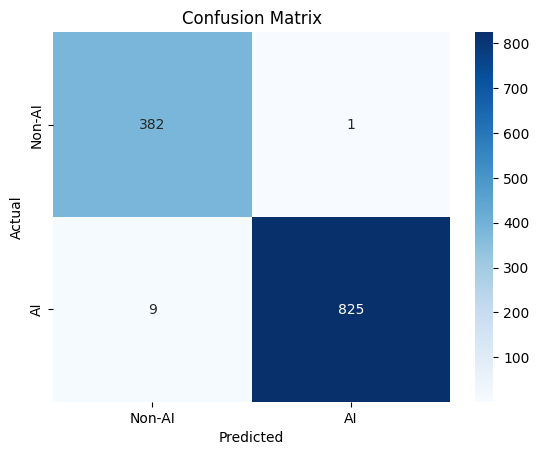

In [30]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()

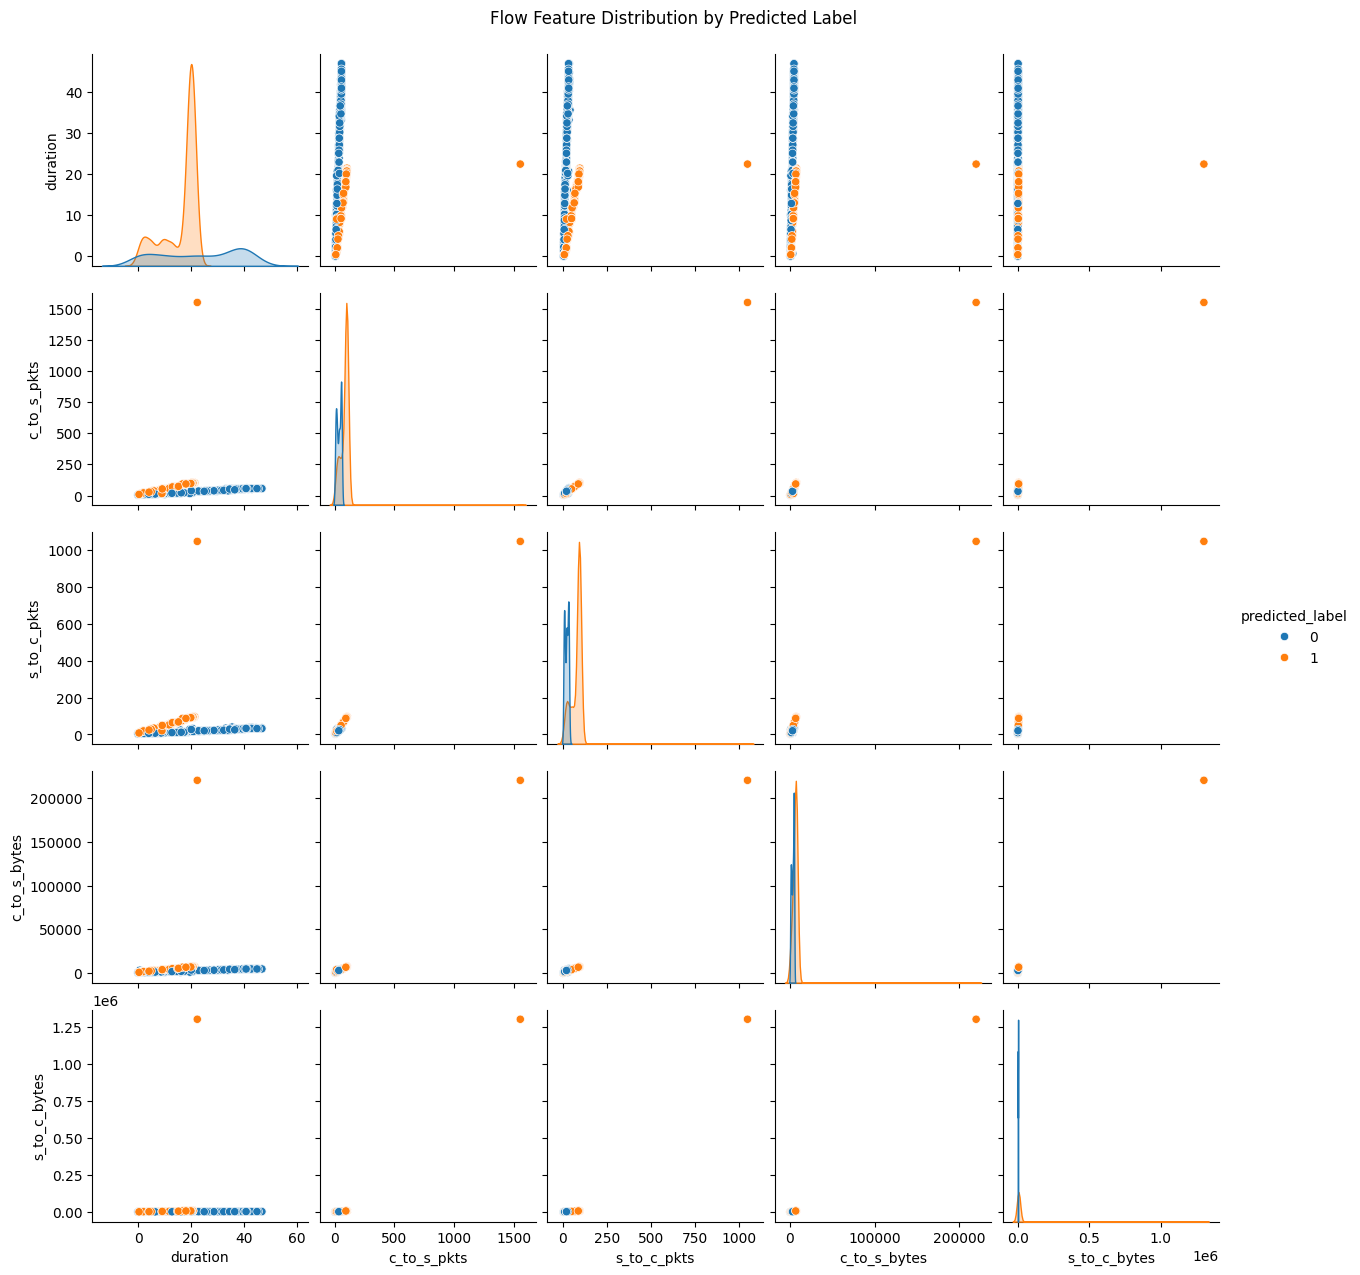

In [31]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('pairplot.png')
plt.show()

In [32]:
# Load the trained classifier
clf = joblib.load("model/ai_ws_classifier_logistic.joblib")

In [13]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data/ws_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

Loaded 1217 flows from 529 files.


In [15]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [16]:
# Predict labels
df["predicted_label"] = clf.predict(X)

In [17]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       383
           1       0.99      0.98      0.98       834

    accuracy                           0.98      1217
   macro avg       0.97      0.98      0.98      1217
weighted avg       0.98      0.98      0.98      1217



In [ ]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('pairplot.png')
plt.show()